In [1]:
#import a library used to analyse formula1 results
from f1analiser import *

In [4]:
#download a data from formula1.com
years = [2016,2017,2018,2019,2020,2021]
data = get_data(years,verbose=1)

Year 2016 is loaded
Year 2017 is loaded
Year 2018 is loaded
Year 2019 is loaded
Year 2020 is loaded
Year 2021 is loaded


In [5]:
#and save it to a file
data.to_csv('data_16-21.csv', encoding='utf-8')

In [6]:
#or load it from a file
data = pd.read_csv('data_16-21.csv', encoding='utf-8')
data = data.drop("Unnamed: 0",axis=1)

In [7]:
data.head()

,driver,year,GP,fp1,fp1+,fp2,fp2+,fp3,fp3+,q1,q1+,q2,q2+,q3,q3+,r
0,Rosberg,2016,Australia,91.814,2.089,107.356,8.515,85.800,0.176,86.934,1.583,84.796,0.191,84.197,0.360,1.0
1,Hamilton,2016,Australia,89.725,0.000,98.841,0.000,85.624,0.000,85.351,0.000,84.605,0.000,83.837,0.000,2.0
2,Ricciardo,2016,Australia,90.875,1.150,99.535,0.694,86.768,1.144,86.945,1.594,85.599,0.994,85.589,1.752,4.0
3,Vettel,2016,Australia,NaN,NaN,100.761,1.920,85.852,0.228,86.945,1.594,85.257,0.652,84.675,0.838,3.0
4,Verstappen,2016,Australia,91.720,1.995,NaN,NaN,86.701,1.077,86.934,1.583,85.615,1.010,85.434,1.597,10.0


In [18]:
#train linear regression estimating qualification times based on practice times
XY = pd.DataFrame(data, columns=['fp1','fp2','fp3','q1','q2','q3']).dropna()
X = pd.DataFrame(XY, columns=['fp1','fp2','fp3']).to_numpy()
Y = pd.DataFrame(XY, columns=['q1','q2','q3']).to_numpy()

model = LinearRegression().fit(X,Y)
print(model.score(X,Y))
print(model.intercept_,model.coef_)

0.9817290704673475
[-0.55886913 -1.16330757 -1.42223721] [[0.18951718 0.07090261 0.73789346]
 [0.20549866 0.16950663 0.62134038]
 [0.18686264 0.17361542 0.6393271 ]]


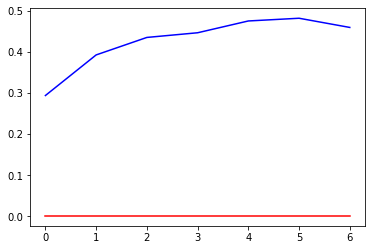

[0.2930862235134988, 0.3918922907798366, 0.434454161110574, 0.44583700560447853, 0.4745386819961733, 0.48117245013427506, 0.45879408484635403]
[0, 0, 0, 0, 0, 0, 0]


In [72]:
#train linear regression estimating qualification losses based on practice losses
XY = pd.DataFrame(data, columns=['fp1+','fp2+','fp3+','q1+','q2+','q3+']).dropna()
X = pd.DataFrame(XY, columns=['fp1+','fp2+','fp3+']).to_numpy()
Y = pd.DataFrame(XY, columns=['q1+','q2+','q3+']).to_numpy()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

trScores = []
tstScores = []
for j in range(7):
    poly = PolynomialFeatures(j+1)
    polyX = poly.fit_transform(X)
    trS = 0
    tstS = 0
    for k in range(100):
        X_train, X_test, Y_train, Y_test = train_test_split(polyX,Y,test_size=20)
        model = LinearRegression().fit(X_train,Y_train)
        
        trS+= model.score(X_train,Y_train)
        tstS+= model.score(X_test,Y_test)
    
    trScores.append(max([trS/100,0]))
    tstScores.append(max([tstS/100,0]))
    
    
import matplotlib.pyplot as plt

plt.plot(trScores,c='blue')
plt.plot(tstScores,c='red')
                     
plt.show()
print(trScores)
print(tstScores)